In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               6
Dependents           15
Education             9
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     21
Credit_History       50
Property_Area         9
Loan_Status           0
dtype: int64

In [4]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,583.000000,596.000000,598.000000,576.000000,577.000000,548.000000
mean,0.754717,5291.788591,1631.499866,144.895833,342.218371,0.843066
std,1.005077,5816.968137,2953.315785,82.757474,64.319629,0.364071
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3787.500000,1211.500000,126.500000,360.000000,1.000000
75%,1.500000,5746.000000,2324.000000,166.250000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


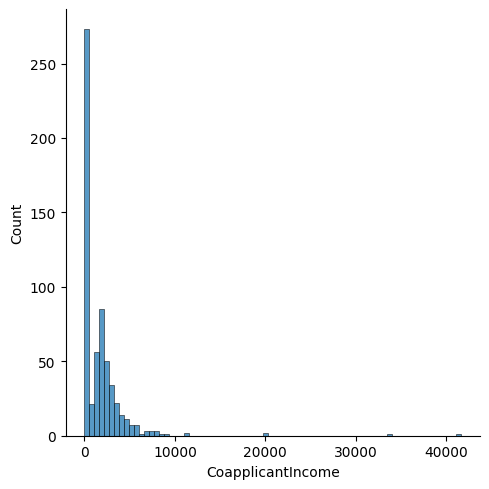

In [5]:
sns.displot(dataset["CoapplicantIncome"])
plt.show()

Now we will apply min max scaling on "CoapplicantIncome" using scikit-learn

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
ms = MinMaxScaler()
ms.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_minmax"] = ms.transform(dataset[["CoapplicantIncome"]])

In [9]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_minmax
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,0.000000


C:\Users\tanay\AppData\Local\Temp\ipykernel_380\3709369050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\tanay\AppData\Local\Temp\ipykernel_380\3709369050.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_minmax"])


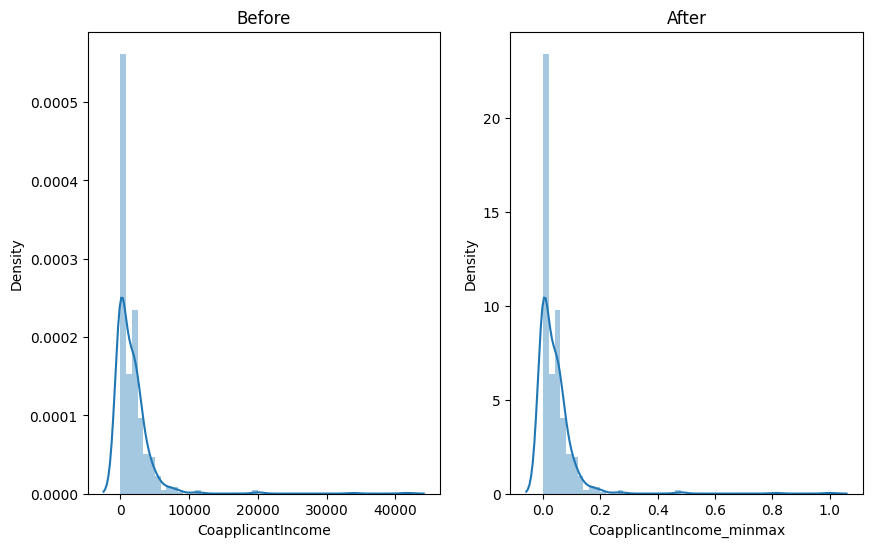

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title("Before")
sns.distplot(dataset["CoapplicantIncome"])

plt.subplot(1, 2, 2)
plt.title("After")
sns.distplot(dataset["CoapplicantIncome_minmax"])
plt.show()